<a href="https://colab.research.google.com/github/asin977/DATASCIENCE-ASSIGNMENT/blob/main/Assessment2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/test_2umaH9m.csv')
print(df.head())


   employee_id         department     region   education gender  \
0         8724         Technology  region_26  Bachelor's      m   
1        74430                 HR   region_4  Bachelor's      f   
2        72255  Sales & Marketing  region_13  Bachelor's      m   
3        38562        Procurement   region_2  Bachelor's      f   
4        64486            Finance  region_29  Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   24                   NaN   
1               other                1   31                   3.0   
2               other                1   31                   1.0   
3               other                3   31                   2.0   
4            sourcing                1   30                   4.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  
0                  1              1            0                  77  
1                  5              0     

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ["department", "region", "education", "gender", "recruitment_channel"]
le = LabelEncoder()

for col in categorical_features:
    df[col] = le.fit_transform(df[col])


In [ ]:
df["performance_score"] = df["avg_training_score"] * (df["KPIs_met >80%"] + 1)


In [ ]:
import pandas as pd



train = pd.read_csv("/content/train_LZdllcl.csv", on_bad_lines="skip")
test = pd.read_csv("/content/test_2umaH9m.csv", on_bad_lines="skip")

print(train.head)
print(test.head)


<bound method NDFrame.head of       employee_id         department     region         education gender  \
0           65438  Sales & Marketing   region_7  Master's & above      f   
1           65141         Operations  region_22        Bachelor's      m   
2            7513  Sales & Marketing  region_19        Bachelor's      m   
3            2542  Sales & Marketing  region_23        Bachelor's      m   
4           48945         Technology  region_26        Bachelor's      m   
...           ...                ...        ...               ...    ...   
94317        3030         Technology  region_14        Bachelor's      m   
94318       74592         Operations  region_27  Master's & above      f   
94319       13918          Analytics   region_1        Bachelor's      m   
94320       13614  Sales & Marketing   region_9               NaN      m   
94321       51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous

<ipython-input-21-6fce2be07b56>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/train_LZdllcl.csv", on_bad_lines="skip")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


print(train.info())
print(train.describe())
print(train["is_promoted"].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94322 entries, 0 to 94321
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           94322 non-null  object 
 1   department            94322 non-null  object 
 2   region                94322 non-null  object 
 3   education             90211 non-null  object 
 4   gender                94322 non-null  object 
 5   recruitment_channel   94322 non-null  object 
 6   no_of_trainings       94322 non-null  int64  
 7   age                   94322 non-null  int64  
 8   previous_year_rating  87229 non-null  float64
 9   length_of_service     94322 non-null  int64  
 10  KPIs_met >80%         94321 non-null  float64
 11  awards_won?           94321 non-null  float64
 12  avg_training_score    94321 non-null  float64
 13  is_promoted           94320 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 10.1+ MB
None
       

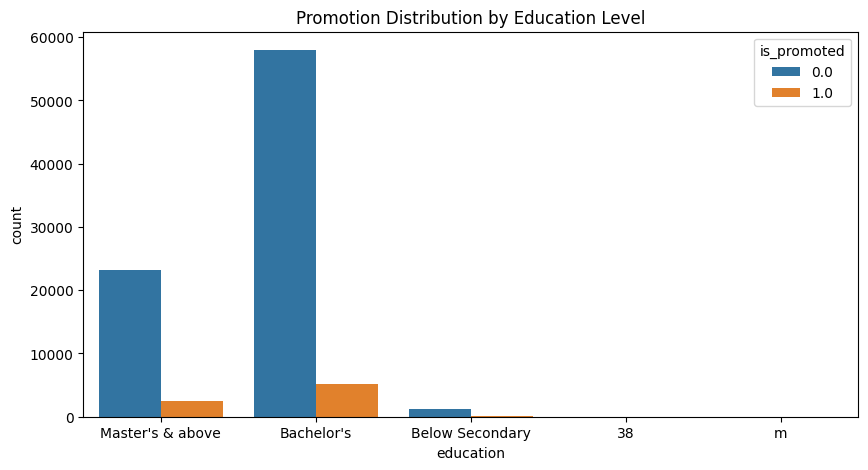

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


plt.figure(figsize=(10,5))
sns.countplot(x="education", hue="is_promoted", data=train)
plt.title("Promotion Distribution by Education Level")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



train["interaction_score"] = train["avg_training_score"] * (train["KPIs_met >80%"] + 1)
test["interaction_score"] = test["avg_training_score"] * (test["KPIs_met >80%"] + 1)


In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_submission_M0L0uXE.csv')
print(df)


       employee_id  is_promoted
0             8724            0
1            74430            0
2            72255            0
3            38562            0
4            64486            0
...            ...          ...
23485        53478            0
23486        25600            0
23487        45409            0
23488         1186            0
23489         5973            0

[23490 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Lasso
from imblearn.over_sampling import SMOTE


train = pd.read_csv("/content/train_LZdllcl.csv", engine="python", on_bad_lines="skip")
test = pd.read_csv("/content/test_2umaH9m.csv", engine="python", on_bad_lines="skip")


print(train.info())
print(train.describe())
print(train["is_promoted"].value_counts(normalize=True))




train["previous_year_rating"].fillna(train["previous_year_rating"].median(), inplace=True)
test["previous_year_rating"].fillna(test["previous_year_rating"].median(), inplace=True)


categorical_features = ["department", "region", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_features:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


train["interaction_score"] = train["avg_training_score"] * (train["KPIs_met >80%"] + 1)
test["interaction_score"] = test["avg_training_score"] * (test["KPIs_met >80%"] + 1)


X = train.drop(columns=["employee_id", "is_promoted"])
y = train["is_promoted"]
X_test = test.drop(columns=["employee_id"])


smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_val_pred_lasso = lasso.predict(X_val_scaled)
y_val_pred_lasso_binary = (y_val_pred_lasso > 0.5).astype(int)
print("Lasso Regression F1 Score:", f1_score(y_val, y_val_pred_lasso_binary))


params = {
    'objective': 'binary',
    'metric': 'f1',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 50,
    'max_depth': 7,
    'min_child_samples': 25,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'reg_lambda': 1.2,
    'random_state': 42
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)

model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_val], early_stopping_rounds=100, verbose_eval=50)


val_preds = model.predict(X_val)
val_preds = (val_preds > 0.5).astype(int)
print("LightGBM F1 Score:", f1_score(y_val, val_preds))


test_preds = model.predict(X_test)
test_preds = (test_preds > 0.5).astype(int)
submission = pd.DataFrame({"employee_id": test["employee_id"], "is_promoted": test_preds})
submission.to_csv("submission.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94322 entries, 0 to 94321
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           94322 non-null  object 
 1   department            94322 non-null  object 
 2   region                94322 non-null  object 
 3   education             90211 non-null  object 
 4   gender                94322 non-null  object 
 5   recruitment_channel   94322 non-null  object 
 6   no_of_trainings       94322 non-null  int64  
 7   age                   94322 non-null  int64  
 8   previous_year_rating  87229 non-null  float64
 9   length_of_service     94322 non-null  int64  
 10  KPIs_met >80%         94321 non-null  float64
 11  awards_won?           94321 non-null  float64
 12  avg_training_score    94321 non-null  float64
 13  is_promoted           94320 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 10.1+ MB
None
       

<ipython-input-42-a44b8b6fd27e>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["previous_year_rating"].fillna(train["previous_year_rating"].median(), inplace=True)
<ipython-input-42-a44b8b6fd27e>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

ValueError: Input y contains NaN.

In [48]:
y.fillna(0, inplace=True)  # Assuming missing values mean 'not promoted'


In [51]:
!pip install --upgrade lightgbm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


In [53]:
!pip install --upgrade lightgbm


In [63]:
train.loc[:, "education"] = train["education"].fillna("Unknown")
train.loc[:, "previous_year_rating"] = train["previous_year_rating"].fillna(train["previous_year_rating"].median())
train.loc[:, "KPIs_met >80%"] = train["KPIs_met >80%"].fillna(0)
train.loc[:, "awards_won?"] = train["awards_won?"].fillna(0)
train.loc[:, "avg_training_score"] = train["avg_training_score"].fillna(train["avg_training_score"].median())
train.loc[:, "is_promoted"] = train["is_promoted"].fillna(0)  # Assuming missing labels mean not promoted


In [68]:
import lightgbm as lgb
from sklearn.metrics import f1_score


def f1_metric(preds, dtrain):
    labels = dtrain.get_label()
    preds_binary = (preds > 0.5).astype(int)
    f1 = f1_score(labels, preds_binary)
    return 'f1', f1, True


params = {
    'objective': 'binary',
    'learning_rate': 0.05,
    'num_leaves': 50,
    'max_depth': 7,
    'min_child_samples': 25,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'reg_lambda': 1.2,
    'random_state': 42
}

lgb_train = lgb.Dataset(X_train, y_train)
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)


model = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_train, lgb_val],
    feval=f1_metric
)


val_preds = model.predict(X_val)
val_preds_binary = (val_preds > 0.5).astype(int)


print("LightGBM F1 Score:", f1_score(y_val, val_preds_binary))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34519, number of negative: 69038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1155
[LightGBM] [Info] Number of data points in the train set: 103557, number of used features: 13
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

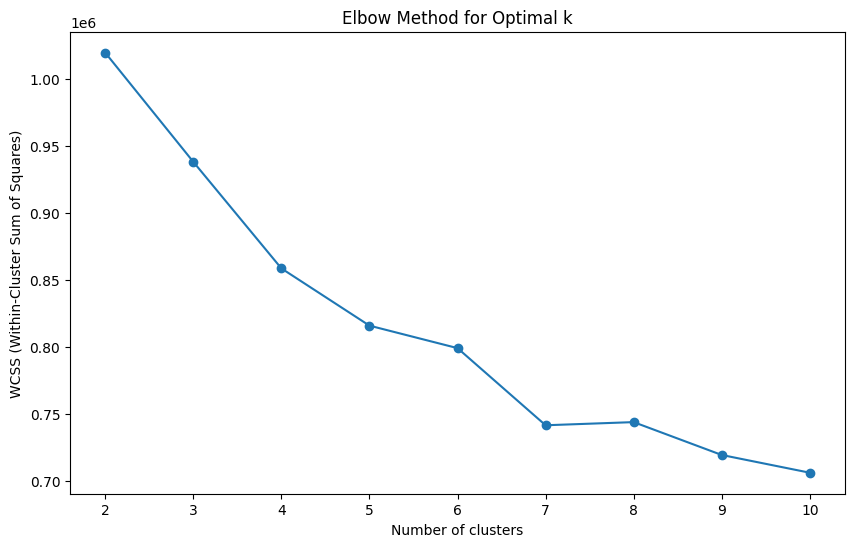

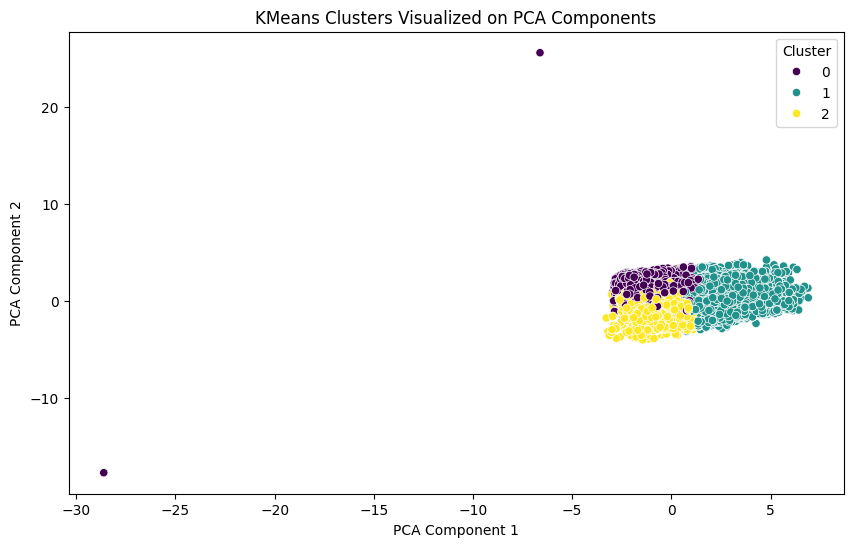

Cluster counts:
cluster
2    45248
0    30009
1    19065
Name: count, dtype: int64


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


df = pd.read_csv("/content/train_LZdllcl.csv", engine="python", on_bad_lines="skip")


df.loc[:, "education"] = df["education"].fillna("Unknown")
df.loc[:, "previous_year_rating"] = df["previous_year_rating"].fillna(df["previous_year_rating"].median())
df.loc[:, "KPIs_met >80%"] = df["KPIs_met >80%"].fillna(0)
df.loc[:, "awards_won?"] = df["awards_won?"].fillna(0)
df.loc[:, "avg_training_score"] = df["avg_training_score"].fillna(df["avg_training_score"].median())
df.loc[:, "is_promoted"] = df["is_promoted"].fillna(0)


categorical_features = ["department", "region", "education", "gender", "recruitment_channel"]
le = LabelEncoder()
for col in categorical_features:
    df.loc[:, col] = le.fit_transform(df[col])


features = df.drop(columns=["employee_id", "is_promoted"])


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


wcss = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(cluster_range, wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["cluster"] = kmeans.fit_predict(features_scaled)



pca = PCA(n_components=2, random_state=42)
pca_features = pca.fit_transform(features_scaled)
df["pca1"] = pca_features[:, 0]
df["pca2"] = pca_features[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x="pca1", y="pca2", hue="cluster", data=df, palette="viridis")
plt.title("KMeans Clusters Visualized on PCA Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


print("Cluster counts:")
print(df["cluster"].value_counts())


In [76]:
import pandas as pd

# Load the test dataset (ensure this file has the correct number of rows)
test = pd.read_csv("/test_2umaH9m.csv", engine="python", on_bad_lines="skip")
print("Number of rows in test dataset:", test.shape[0])

# Here, assume you have already generated predictions (for example, using your model).
# If you haven't yet, here's a dummy example that sets is_promoted to 0 for every row:
test["is_promoted"] = 0  # Replace this with your actual predictions if available

# Create the final submission file with only the required columns:
final_submission = test[["employee_id", "is_promoted"]]

# Save the submission file
final_submission.to_csv("final_submission.csv", index=False)
print("Final submission saved with", final_submission.shape[0], "rows.")


Number of rows in test dataset: 23490
Final submission saved with 23490 rows.


In [79]:
from google.colab import files
files.download("final_submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>